# Homework 7 (Due 5/21/2025 at 11:59pm)



## Name:

## ID:

**Submission instruction:**
- Download the file as .ipynb (see top right corner on the webpage).
- Write your name and ID in the field above.
- Answer the questions in the .ipynb file in either markdown or code cells.
- Before submission, make sure to rerun all cells by clicking `Kernel` -> `Restart & Run All` and check all the outputs.
- Upload the .ipynb file to Gradescope.

In this homework, we use the multiclass logistic regression model to classify the `species` of penguins based on `bill_length_mm` and `bill_depth_mm` features.

**Q1** Load the data. Remove missing value. Standardize the features.

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.inspection import DecisionBoundaryDisplay


# Load the dataset
df = sns.load_dataset('penguins')

# Drop rows with missing values
df.dropna(inplace=True)


features = ['bill_length_mm', 'bill_depth_mm']

# scale the features
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

**Q2** Split the data 50:50 into a training set and a test set. In the`train_test_split` function,
use `stratified` sampling, so that the proportion of different species is the same in the training set and the test set. Set `random_state=0` for reproducibility.



In [3]:
df_train, df_test = train_test_split(df, test_size=0.5, random_state=0, stratify=df['species'])


**Q3** Look at the documentation of `LogisticRegression` in `sklearn`. Notice that the default is to use L2 regularization as in ridge regression. 

Here, let's fit a multiclass logistic regression model **without regularization** on the training set. Report the training and testing accuracy.

In [4]:

# Initialize and train the logistic regression model
clf = LogisticRegression(penalty=None)
clf.fit(df_train[features], df_train['species'])

train_accuracy = accuracy_score(df_train['species'], clf.predict(df_train[features]))
test_accuracy = accuracy_score(df_test['species'], clf.predict(df_test[features]))
print(f'Train accuracy: {train_accuracy:.2f}, Test accuracy: {test_accuracy:.2f}')


Train accuracy: 0.98, Test accuracy: 0.96


**Q4** Visualize the confusion matrix on the test set using a heatmap. 

An example heatmap is shown below. You can have differnt style.

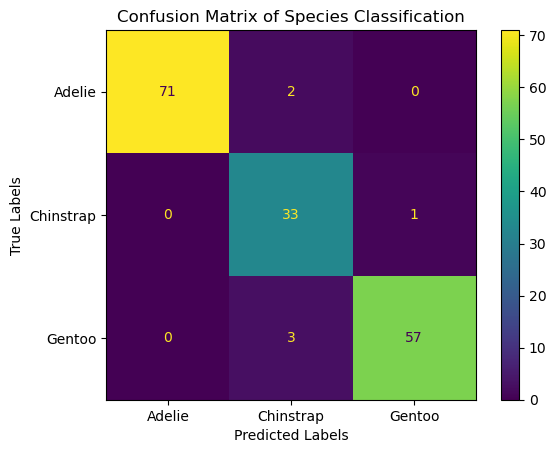

In [5]:
# Evaluate the model
conf_matrix = confusion_matrix(df_test['species'], clf.predict(df_test[features]))

# Plotting the confusion matrix
ConfusionMatrixDisplay(conf_matrix, display_labels=clf.classes_).plot()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of Species Classification')
plt.show()


**Q5** Use `DecisionBoundaryDisplay` to visualize the decision boundaries and the test set. 

- The decision boundaries are obtained from the trained classifier (using training dataset). 
- The scatter plot should show the data points from the test set.

You can copy and past codes from the lecture note for the decision boundary plot.

An example of the decision boundary plot is shown below.

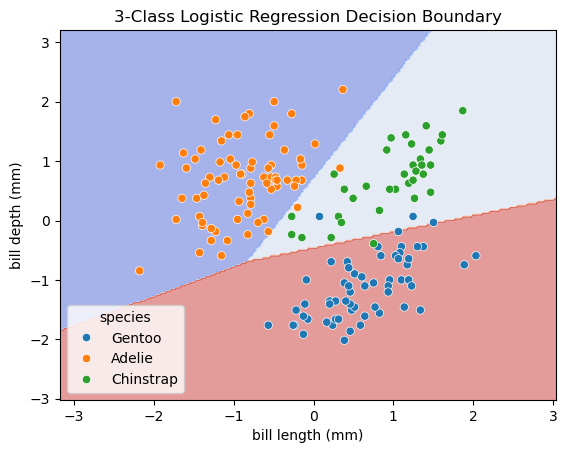

In [6]:
# Plot the decision boundaries using DecisionBoundaryDisplay
fig, ax = plt.subplots()
db_display = DecisionBoundaryDisplay.from_estimator(
    clf,
    df_test[features],
    grid_resolution=200,
    response_method="predict",  # Can be "predict_proba" for probability contours
    alpha=0.5,
    cmap='coolwarm',
    ax=ax
)

# Scatter plot of the data points
sns.scatterplot(data=df_test, x='bill_length_mm', y='bill_depth_mm', hue='species', ax=ax)


# Adding title and labels
ax.set_title('3-Class Logistic Regression Decision Boundary')
ax.set_xlabel('bill length (mm)')
ax.set_ylabel('bill depth (mm)')

# Show plot
plt.show()
